#Computação Numérica


**ATIVIDADES : UNIDADE II - Valor: 5,0 pontos.**

**ALUNO: Carlos Eduardo Medeiros da Silva**

Estas são as atividades referentes a avaliação do laboratório na unidade II.

Atividade 01 - Seja o seguinte conjunto de pontos,

$$
\begin{aligned}
&\\
&\begin{array}{lllllll}
\hline \hline  &  \\
\hline \text { $x_k$ } & -1,0 & -0,6 & -0,2 & 0,2 & 0,6 & 1,0\\
\hline \text { $y_k$ } & -0,9602 & 0,6405 & -0,1647 & 0,34449 & -0,3201\\
\hline \text { $c_i$ } & -1,5 & -0,5 & 0,0 & 0,4 & 1,0 & --\\
\hline
\end{array}
\end{aligned}
$$

encontre a função analiticamente e, em seguida, implemente-a mostrando os respectivos gráficos e a qualidade do ajuste

\begin{equation*}
f(x) = a_0 \phi_0(x) + a_1 \phi_1(x) + a_2 \phi_2(x) + a_3 \phi_3(x) + a_4 \phi_4(x)
\end{equation*}

com $\phi_i(x_k) = exp\left ( -\left ( 2\sigma^2 \right )^{-1}\left ( x_k - c_i \right )^2 \right ),\,i = 0,1,\cdots, 4$ (e, $\sigma$ definido pelo usuário) que melhor ajusta o conjunto de pontos. De modo que $EMQ \leq 0,03.$


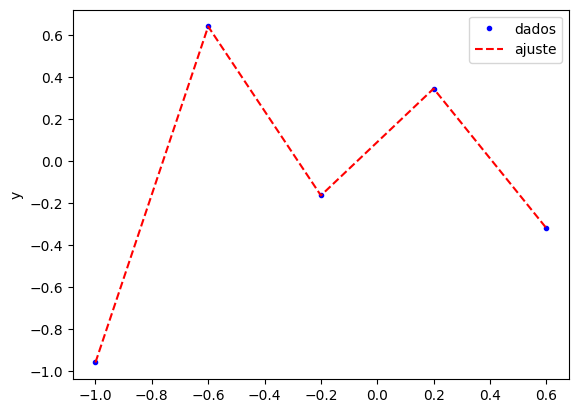


O Erro médio quadrático (EMQ) = 9.817344537265942e-27
T(t) =~ -9.1120g0(t) + 18.1350g1(t) + -36.5773g2(t) + 35.1914g3(t) + -17.6272g4(t)


In [90]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.0,-0.6,-0.2,0.2,0.6])
y = np.array([[-0.9602],[0.6405],[-0.1647],[0.34449],[-0.3201]])
y_plot = np.array([-0.9602,0.6405,-0.1647,0.34449,-0.3201])
c = np.array([-1.5,-0.5,0,0.4,1.0])

phi = np.zeros((5,5))
sig = np.std(x, ddof = 1)


for i in range(len(phi)):
  for j in range(len(phi[i])):
    phi[i][j] = np.exp((-1/ (2* sig**2) )*pow((x[i]-c[j]),2))


w = np.linalg.inv(phi.T @ phi) @ (phi.T@y)


fx = (phi)@w

EMQ = ((1/len(x))*(np.sum((y - fx)**2)))

plt.plot(x,y,"b.", label = "dados")

plt.plot(x,fx,"--r", label = "ajuste")
plt.ylabel("y")
plt.legend()
plt.show()
print()
print(f"O Erro médio quadrático (EMQ) = {EMQ}")
print(f"T(t) =~ {w[0][0]:.4f}g0(t) + {w[1][0]:.4f}g1(t) + {w[2][0]:.4f}g2(t) + {w[3][0]:.4f}g3(t) + {w[4][0]:.4f}g4(t)")

Atividade 02 - Obtenha no site https://portal.inmet.gov.br/ ou https://labeee.ufsc.br/downloads/arquivos-climaticos/formato-try-swera-csv-bin dados para ajustar uma curva relativa a variação da temperatura ao longo de uma semana, por meio de uma função do tipo $T \approx a_0 g_0(t) + a_1 g_1(t) + a_2 g_2(t) + a_3 g_3(t) + a_4g_4(t)$. Onde $g_i(t)$ com $i = 0,\cdots, 4$ são funções de base radial.

   Dia  Temperatura Média do dia
0    1                      27.2
1    2                      26.9
2    3                      26.7
3    4                      27.4
4    5                      27.0
5    6                      27.3
6    7                      27.3



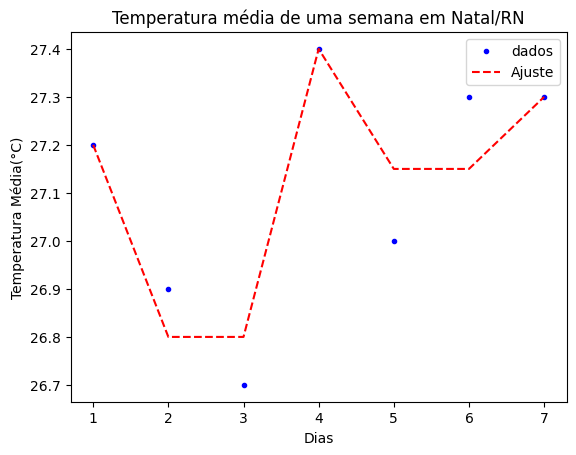


O Erro médio quadrático (EMQ) = 0.009285714285714295
T(t) =~ 27.2000g0(t) + 191277849.9223g1(t) + 27.4000g2(t) + 193775881.5445g3(t) + 27.3000g4(t)


In [89]:
import pandas as pd

dataFrame = pd.read_excel('./drive/MyDrive/CN/Prática unidade2/DadosNatal.xlsx',sheet_name='Página1')


print(dataFrame)

h = dataFrame.iloc[:,0].to_numpy()
t = np.array([dataFrame.iloc[:,1].to_numpy()])
t1 = dataFrame.iloc[:,1].to_numpy()

c1 = np.linspace(h.min(), h.max(), 5)

sig = 0.089

phi = np.zeros((len(h),len(c1)))


for i in range(len(phi)):
  for j in range(len(c1)):
    phi[i][j] = np.exp((-1 / (2 * sig ** 2)) * pow((h[i] - c1[j]), 2))


w = np.linalg.pinv(phi.T @ phi) @ (phi.T@t.T)

fx = (phi)@w

print()
EMQ = ((1/len(h))*(np.sum((t.T - fx)**2)))

plt.plot(h,t1,"b.", label = "dados")
plt.plot(h,fx,"--r", label = "Ajuste")
plt.title('Temperatura média de uma semana em Natal/RN')
plt.xlabel("Dias")
plt.ylabel("Temperatura Média(°C)")
plt.legend()

plt.show()

print()
print(f"O Erro médio quadrático (EMQ) = {EMQ}")

print(f"T(t) =~ {w[0][0]:.4f}g0(t) + {w[1][0]:.4f}g1(t) + {w[2][0]:.4f}g2(t) + {w[3][0]:.4f}g3(t) + {w[4][0]:.4f}g4(t)")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Atividade 03 - Uma empresa está fazendo um teste de mercado para lançamento de um novo produto em 22 cidades de tamanho aproximadamente igual. A venda
(em dólares) e o número vendido por semana nas cidades são listados a seguir:
$$
\begin{aligned}
& \\
&\begin{array}{cc}
\hline \hline \text { cidade } & \text { preço } & \text { venda semanal }  & \text { cidade } & \text { preço } & \text { venda semanal } \\
\hline 1 & 0.59 & 3980 & 12 & 0.49 & 6000\\
\hline2 & 0.80 & 0.59 &  13 & 1.09 & 1190\\
\hline3 & 0.95 & 0.59 &  14 & 0.95 & 1960\\
\hline4 & 0.45 & 0.59 &  15 & 0.79 & 2760\\
\hline5 & 0.79 & 0.59 &  16 & 0.65 & 4330\\
\hline6 & 0.99 & 0.59 &  17 & 0.45 & 6960\\
\hline7 & 0.90 & 0.59 &  18 & 0.60 & 4160\\
\hline8 & 0.65 & 0.59 &  19 & 0.89 & 1990\\
\hline9 & 0.79 & 0.59 &  20 & 0.79 & 2860\\
\hline10 & 0.69 & 0.59 &  21 & 0.99 & 1920\\
\hline11 & 0.79 & 0.59 &  22 & 0.85 & 2160\\
\hline
\end{array}
\end{aligned}
$$
- Primeiramente, a empresa deseja obter a curva de demanda. Ou seja, o quanto irá vender em cada preço potencial. Considere $P$ o preço e $S$ as vendas por semana. Encontre a reta $S = c_1 + c_2\,P$ que melhor ajusta os dados da tabela e gere os gráficos, bem como analise a qualidade do ajuste.
- Depois de estudar os resultados do teste de marketing, a empresa definirá um único preço de venda $P$ em todo o país. Dado um custo de fabricação de $U\$ \,0,23$ por unidade, o lucro total (por cidade, por semana) é $S (P - 0,23)$ dólares. Use os resultados da aproximação anterior para encontrar o preço de venda pelo qual o lucro da empresa será maximizado.

f(x) = 9322.407121 -7903.895845x
O Erro médio (EM) = 7.44132028723305e-13


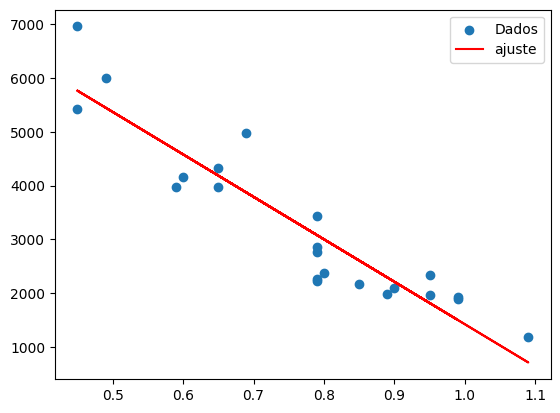


Portanto o preço fixo que maxima o lucro da empresa, dado o ajuste linear feito: 0.45


In [ ]:
#COMO OS DADOS DA CIDADE 2-11 DA VENDA SEMANAL NÃO ESTÁ COERENTE, EU DEDUZIR OS POSSIVEIS VALORES

s = np.array([3980,2380,2340,5420,2230,1890,2100,3980,2260,4980,3430,6000,1190,1960,2760,4330,6960,4160,1990,2860,1920,2160])
p = np.array([0.59,0.80,0.95,0.45,0.79,0.99,0.90,0.65,0.79,0.69,0.79,0.49,1.09,0.95,0.79,0.65,0.45,0.60,0.89,0.79,0.99,0.85])

f = np.array([[sum(s)],[sum(s*p)]])
phi = np.array([[22,sum(p)],[sum(p),sum(p*p)]])

c = np.linalg.solve(phi,f)

fx = c[0][0] + c[1][0]*p

print(f"f(x) = {c[0][0]:2f} {c[1][0]:2f}x")

EM = ((1/len(p))*(np.sum((s.T - fx))))
print(f"O Erro médio (EM) = {EM}")


plt.scatter(p,s, label = 'Dados')
plt.plot(p,fx,'r',label = 'ajuste')
plt.legend()
plt.show()
######################################################

P = p[0]
lucroTotalMax = c[0][0] + c[1][0]*(p[0]-0.23)

for preco in p:
  atual = c[0][0] + c[1][0]*(preco-0.23)

  if atual > lucroTotalMax:
    lucroTotalMax = atual
    P = preco

print()
print(f"Portanto o preço fixo que maxima o lucro da empresa, dado o ajuste linear feito: {P}")




Atividade 04 - Um estudo aponta que o nível de um dado medicamento na corrente sanguínea de um paciente é fornecida por meio da seguinte tabela,
$$
\begin{aligned}
& \\
&\begin{array}{cc}
\hline \hline \text { horas } & \text { concentração em nanogramas por ml } \\
\hline 1 & 7.9 \\
\hline 2 & 12.8 \\
\hline 3 & 15.4 \\
\hline 4 & 16.6 \\
\hline 5 & 17.7 \\
\hline 6 & 16.3 \\
\hline 7 & 15.3\\
\hline 8 & 14.0 \\
\hline
\end{array}
\end{aligned}
$$
Determine o instante de tempo de pico do medicamento e a meia vida. A
meia-vida de uma substância é o tempo desde a concentração de pico até o momento em que cai para a metade deste nível. Compare o modelo obtido com a seguinte função: $y = \alpha t e^{\beta\,t}.$

In [85]:
def bissercao(a,b,f,tol):
    if f(a)*f(b) >= 0:
        return print("INTERVALO INVALIDO")
    x0 = 0

    while True:
        x = (a+b)/2


        if f(a)*f(x) < 0:
            b = x

        else:
            a = x

        erro = (x-x0) / x

        if abs(erro) < tol:
            return x

        x0 = x

f(t) = 9.8470te^-0.2142t


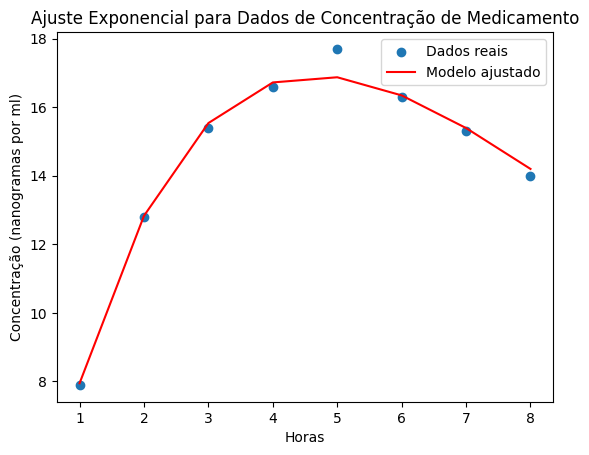


O instante de tempo do pico, dado o ajuste não linear : 4.6691h, com uma concentração máxima: 16.9140ng/ml 
O instante de tempo que o medicamento atinge a meia vida, dado o ajuste não linear: 12.5064h


In [91]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([7.9,12.8,15.4,16.6,17.7,16.3,15.3,14.0])

g0 = x**0
g1 = x

phi = np.array([[sum(g0*g0),sum(g0*g1)],
                [sum(g1*g0),sum(g1*g1)]])

f = np.array([[sum(np.log(y/x)*g0)],[sum(np.log(y/x)*g1)]])

w = np.linalg.solve(phi,f)

fx = lambda x: np.exp(w[0][0])*x*np.exp(w[1][0]*x)


print(f"f(t) = {(np.exp(w[0][0])):.4f}te^{w[1][0]:.4f}t")
plt.scatter(x, y, label='Dados reais')
plt.plot(x, fx(x), 'r-', label='Modelo ajustado')
plt.title('Ajuste Exponencial para Dados de Concentração de Medicamento')
plt.xlabel('Horas')
plt.ylabel('Concentração (nanogramas por ml)')
plt.legend()
plt.show()

##################################
#Pico do medicamento => y' = 0, tempo de meia vida P/2 = αte^βt

t_pico = (-1/w[1][0])
print()
print(f"O instante de tempo do pico, dado o ajuste não linear : {t_pico:.4f}h, com uma concentração máxima: {fx(t_pico):.4f}ng/ml " )

f = lambda t: np.exp(w[0][0])*t*np.exp(w[1][0]*t) - (fx(t_pico)/2)

tMeiaVida = bissercao(5,20,f,10e-5)
print(f"O instante de tempo que o medicamento atinge a meia vida, dado o ajuste não linear: {tMeiaVida:.4f}h")
